### 使用TensorFlow实现线性回归LR

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

生成具有一定线性的数据/ $y = 2x$

numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
<br>$\qquad$ 在指定的间隔内返回均匀间隔的数字。

numpy.random.normal(loc=0.0, scale=1.0, size=None)
<br>$\qquad$ loc：float 此概率分布的均值（对应着整个分布的中心centre）
<br>$\qquad$ scale：float 此概率分布的标准差（对应于分布的宽度，scale越大越矮胖，scale越小，越瘦高）
<br>$\qquad$ size：int or tuple of ints 输出的shape，默认为None，只输出一个值

np.random.randn(size)所谓标准正态分布，对应于np.random.normal(loc=0, scale=1, size)。

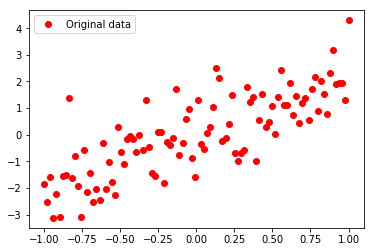

In [2]:
datasize = 100
train_X = np.linspace(start = -1, stop = 1, num = datasize)
train_Y = 2.0 * train_X + np.random.normal(loc = 0.0, scale = 1.0, size = datasize)

plt.plot(train_X, train_Y, 'ro', label = 'Original data')
plt.legend()
plt.show()

创建模型

tf.placeholder(dtype, shape=None, name=None)
<br>$\qquad$ 此函数可以理解为形参，用于定义过程，在执行的时候再赋具体的值
<br>$\qquad$ dtype: 数据类型,常用的是tf.float32,tf.float64等数值类型
<br>$\qquad$ shape: 数据形状,默认是None，就是一维值，也可以是多维，比如[2,3], [None, 3]表示列是3，行不定
<br>$\qquad$ name: 操作的名称

tf.Variable(initializer,name)
<br>$\qquad$ 变量，参数
<br>$\qquad$ initializer：初始化参数
<br>$\qquad$ name：可自定义的变量名称

tf.random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)
<br>$\qquad$ 函数用于从服从指定正太分布的数值中取出指定个数的值。
<br>$\qquad$ shape: 输出张量的形状，必选
<br>$\qquad$ mean: 正态分布的均值，默认为0
<br>$\qquad$ stddev: 正态分布的标准差，默认为1.0
<br>$\qquad$ dtype: 输出的类型，float16、float32、float64、int32、orint64,默认为tf.float32
<br>$\qquad$ seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样
<br>$\qquad$ name: 操作的名称

tf.random_uniform(shape, minval=0, maxval=None, dtype=tf.float32, seed=None, name=None)
<br>$\qquad$ 函数用于从服从均匀分布中输出随机值。
<br>$\qquad$ shape: 输出张量的形状，必选
<br>$\qquad$ minval: dtype 类型的 0-D 张量或 Python 值；生成的随机值范围的下限；默认为0。
<br>$\qquad$ maxval: dtype 类型的 0-D 张量或 Python 值。要生成的随机值范围的上限。如果 dtype 是浮点，则默认为1 。
<br>$\qquad$ dtype: 输出的类型，float16、float32、float64、int32、orint64,默认为tf.float32
<br>$\qquad$ seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样
<br>$\qquad$ name: 操作的名称

tf.reduce_mean(input_tensor, axis=None, keep_dims=False, name=None, reduction_indices=None)
<br>$\qquad$ 函数用于计算张量tensor沿着指定的数轴（tensor的某一维度）上的的平均值，主要用作降维或者计算tensor（图像）的平均值。
<br>$\qquad$ input_tensor： 输入的待降维的tensor
<br>$\qquad$ axis： 指定的轴，如果不指定，则计算所有元素的均值
<br>$\qquad$ keep_dims： 是否降维度，设置为True，输出的结果保持输入tensor的形状，设置为False，输出结果会降低维度
<br>$\qquad$ name：  操作的名称
<br>$\qquad$ reduction_indices： 在以前版本中用来指定轴，已弃用


In [3]:
# 占位符
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# 模型参数
W = tf.Variable(tf.random_normal([1], seed = 1), name = "weight")
b = tf.Variable(tf.zeros([1]), name = "bias")

# 前向结构
Y_hat = tf.multiply(X, W) + b

# 反向优化   cost = 1/m * sum((Y - Y_hat)^2)
cost = tf.reduce_mean(tf.square(Y - Y_hat))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

迭代训练模型

In [4]:
# 初始化所有变量
init = tf.global_variables_initializer()

# 定义参数
train_epochs = 20
display_step = 2

# 启动session
sess = tf.Session()
sess.run(init)
plotdata = {"batchsize":[], "loss":[]}
for epoch in range(train_epochs):
    for x, y in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict = {X:x, Y:y})

    if epoch % display_step == 0:
        loss = sess.run(cost, feed_dict = {X:train_X, Y:train_Y})
        print("Epoch:", epoch, "cost = ", loss, "W = ", sess.run(W), "b = ", sess.run(b))

        if not (loss == 'NAN'):
            plotdata["batchsize"].append(epoch)
            plotdata["loss"].append(loss)

print("Training Finished!")
print("cost = ",sess.run(cost, feed_dict = {X:train_X, Y:train_Y}), "W = ", sess.run(W), "b = ", sess.run(b))      

Epoch: 0 cost =  2.04137 W =  [ 0.41327453] b =  [ 0.5251469]
Epoch: 2 cost =  0.966786 W =  [ 1.63048327] b =  [ 0.20387699]
Epoch: 4 cost =  0.879056 W =  [ 1.96108019] b =  [ 0.07946616]
Epoch: 6 cost =  0.873471 W =  [ 2.04682899] b =  [ 0.04660168]
Epoch: 8 cost =  0.873191 W =  [ 2.06900597] b =  [ 0.03809207]
Epoch: 10 cost =  0.873197 W =  [ 2.07473993] b =  [ 0.03589176]
Epoch: 12 cost =  0.873204 W =  [ 2.07622266] b =  [ 0.03532275]
Epoch: 14 cost =  0.873206 W =  [ 2.07660604] b =  [ 0.03517577]
Epoch: 16 cost =  0.873206 W =  [ 2.07670522] b =  [ 0.03513771]
Epoch: 18 cost =  0.873206 W =  [ 2.07672977] b =  [ 0.03512817]
Training Finished!
cost =  0.873206 W =  [ 2.07673383] b =  [ 0.03512667]


训练模型可视化

In [5]:
# 定义函数
def moving_average(a, w = 10):
    if len(a) < w:
        return a[:]
    
    return [val if idx < w else sum(a[(idx - w):idx])/w for idx, val in enumerate(a)]  
#     result_list = []
#     for idx in range(len(a)):
#         if idx < w:
#             result_list.append(a[idx])
#         else:
#             result_list.append(sum(a[(idx - w):idx])/w)    
#     return result_list

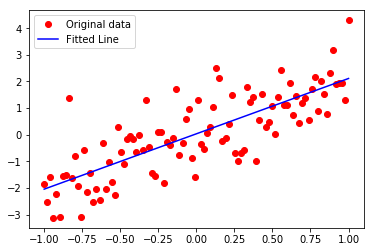

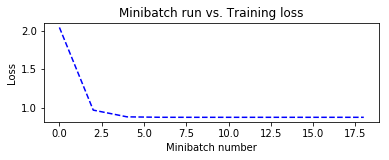

In [6]:
# draw 
plt.plot(train_X, train_Y, "ro", label = "Original data")
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), "b-", label = "Fitted Line")
plt.legend()
plt.show()

# plotdata['avgloss'] = moving_average(plotdata['loss'])
plt.figure(1)
plt.subplot(2,1,1)
# plt.plot(plotdata['batchsize'], plotdata['avgloss'], "b--")
plt.plot(plotdata['batchsize'], plotdata['loss'], "b--")
plt.xlabel("Minibatch number")
plt.ylabel("Loss")
plt.title("Minibatch run vs. Training loss")
plt.show()

使用模型预测

In [7]:
predict_X = [0.2, 0.4, 0.85]
predict_Y = []
predict_Y = sess.run(Y_hat, feed_dict = {X: predict_X})
print(predict_Y)

[ 0.45047346  0.86582023  1.80035055]


In [8]:
sess.close()